In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns

In [2]:
titanic_data=pd.read_csv('titanic3.csv')
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
titanic_data.shape

(1309, 14)

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Analyzing data

<Axes: xlabel='survived', ylabel='count'>

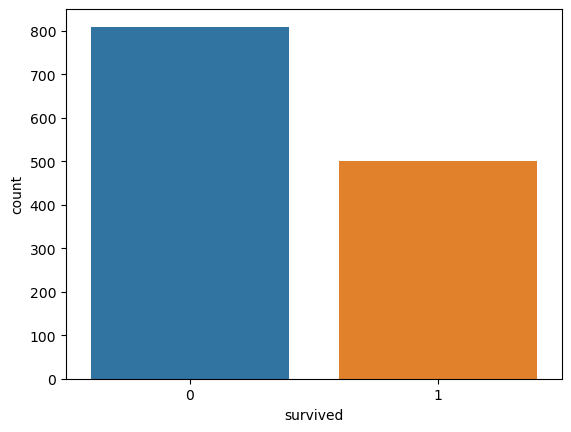

In [5]:
sns.countplot(x='survived',data=titanic_data)

<Axes: xlabel='survived', ylabel='count'>

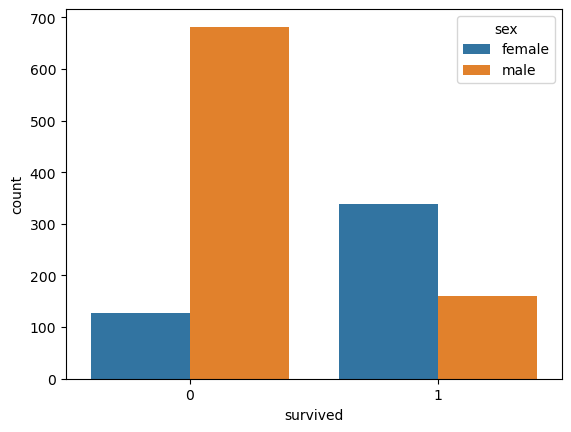

In [6]:
sns.countplot(x='survived',data=titanic_data,hue='sex')

<Axes: xlabel='survived', ylabel='count'>

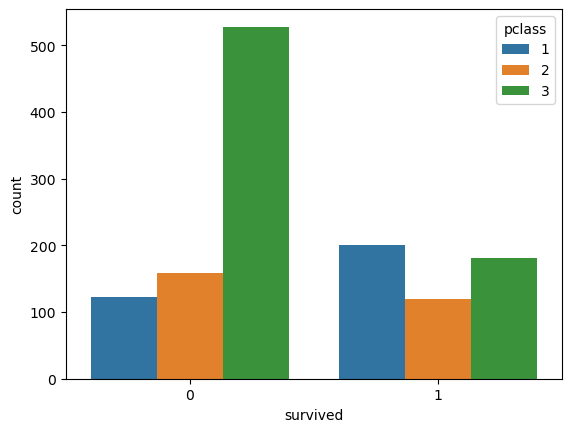

In [7]:
sns.countplot(x='survived',data=titanic_data,hue='pclass')

<Axes: ylabel='Frequency'>

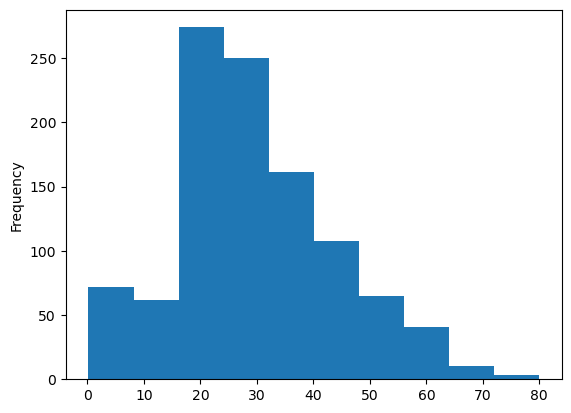

In [8]:
titanic_data['age'].plot.hist()

<Axes: ylabel='Frequency'>

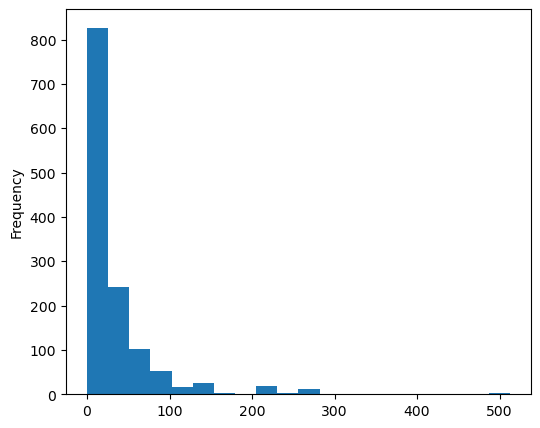

In [9]:
titanic_data['fare'].plot.hist(bins=20,figsize=(6,5))

<Axes: xlabel='sibsp', ylabel='count'>

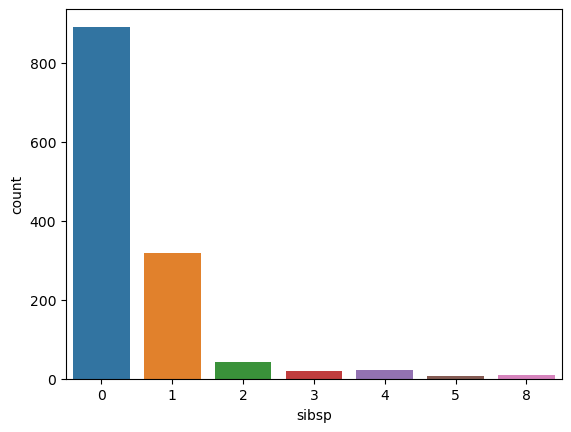

In [10]:
sns.countplot(data=titanic_data,x='sibsp')

<Axes: xlabel='pclass', ylabel='age'>

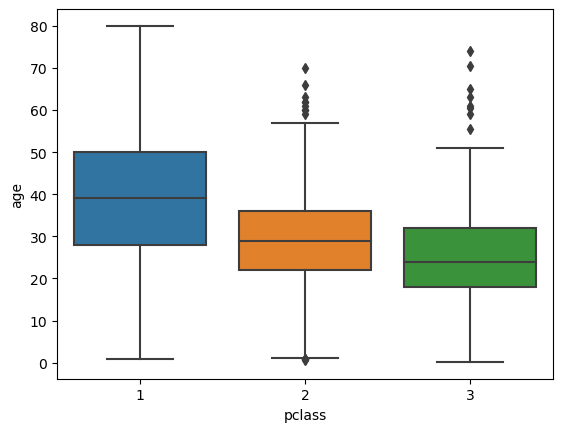

In [11]:
sns.boxplot(x='pclass',y='age',data=titanic_data)

### Data cleaning and wrangling

In [12]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

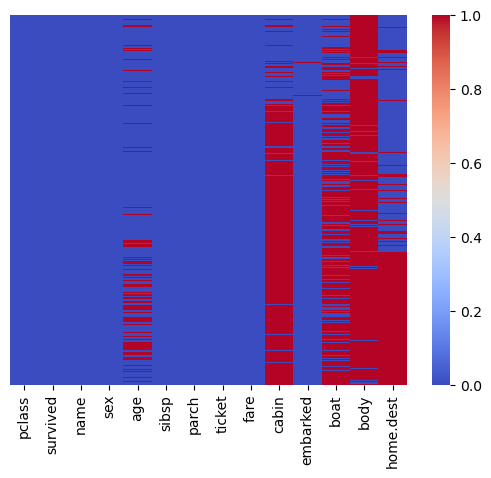

In [13]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='coolwarm')

In [14]:
titanic_data.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)

In [15]:
titanic_data.dropna(inplace=True)

<Axes: >

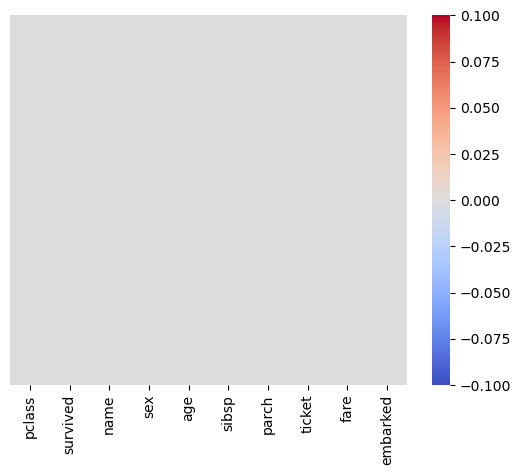

In [16]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='coolwarm')

In [17]:
titanic_data.drop(['name','ticket','embarked'],axis=1,inplace=True)

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   int64  
 1   survived  1043 non-null   int64  
 2   sex       1043 non-null   object 
 3   age       1043 non-null   float64
 4   sibsp     1043 non-null   int64  
 5   parch     1043 non-null   int64  
 6   fare      1043 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.2+ KB


In [19]:
pd.get_dummies(titanic_data['sex'])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1301,0,1
1304,1,0
1306,0,1
1307,0,1


In [20]:
sex=pd.get_dummies(titanic_data['sex'],drop_first=True)

In [21]:
titanic_data.drop('sex',axis=1,inplace=True)

In [22]:
titanic_data=pd.concat([titanic_data,sex],axis=1)

In [23]:
titanic_data.head()

,pclass,survived,age,sibsp,parch,fare,male
0,1,1,29.00,0,0,211.3375,0
1,1,1,0.92,1,2,151.5500,1
2,1,0,2.00,1,2,151.5500,0
3,1,0,30.00,1,2,151.5500,1
4,1,0,25.00,1,2,151.5500,0


### training and testing

In [24]:
x=titanic_data.drop('survived',axis=1)
y=titanic_data['survived']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

y_predicted=model.predict(x_test)

### Model evaluation

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy=accuracy_score(y_test,y_predicted)
print("Accuracy: ",accuracy)

confusion_mat=confusion_matrix(y_test,y_predicted)
print('Confusion matrix: ')
print(confusion_mat)

classification_rep=classification_report(y_test,y_predicted)
print('Classification report: ')
print(classification_rep)

Accuracy:  0.7607655502392344
Confusion matrix: 
[[98 25]
 [25 61]]
Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.71      0.71      0.71        86

    accuracy                           0.76       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.76      0.76      0.76       209



### ROC curve

#### Reciever Operating Characteristic curve is a plot of the true positive rate against the false positive rate.

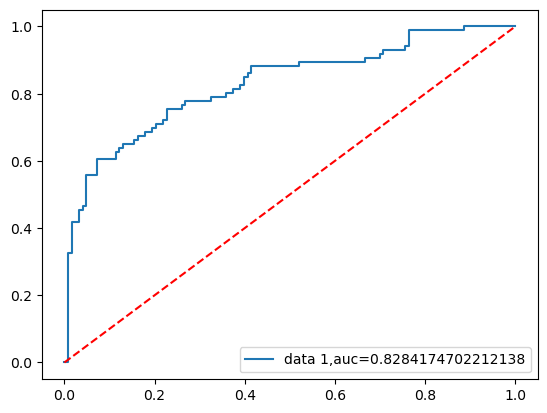

In [28]:
from sklearn import metrics

y_pred_proba=model.predict_proba(x_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.plot([0,1],[0,1],'r--')

plt.legend(loc=4)
plt.show()

### log loss

In [29]:
from sklearn.metrics import log_loss

y_p=model.predict_proba(x_test)

logloss=log_loss(y_test,y_p)

print('Logloss: %.2f'%(logloss))

Logloss: 0.50


### saving

In [30]:
import joblib
joblib.dump(model,'logistic_regression_model1.joblib')

['logistic_regression_model1.joblib']

In [35]:
loaded_model = joblib.load('logistic_regression_model1.joblib')

pclass = 1
male = 0
age = 20
sibsp = 0
fare=150.5500
parch = 1

input_data = [[pclass, male, age, sibsp,fare, parch]]  # Corrected input_data to be 2D
output_data = loaded_model.predict(input_data)
print(output_data)

[0]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
